In [31]:
import pandas as pd


In [32]:
def create_sample():
    raw_df = pd.read_csv("dataset.csv")
    raw_df = raw_df[raw_df["Language"] == 'en'] #keep only those for english 
    raw_df = raw_df.sample(1000, random_state = 1) # NEED: to ensure equal number for each label category #need to set a SEED #equal amount of each class
    raw_df.reset_index(inplace = True)
    raw_df.drop("index", axis=1, inplace = True)
    return raw_df

In [33]:
from pathlib import Path
path = "sample.csv"
sample = Path(path)

if not sample.exists():
    raw_df = create_sample()
    raw_df.to_csv("sample.csv", index=False)
    print("Didn't exist")
else: 
    raw_df = pd.read_csv(path) #need to drop first column
    print("Alreasy existed")

Alreasy existed


In [34]:
raw_df.head(100)

,Text,Language,Label
0,@Killyce @Rich_Harris @mac_hour But one of the...,en,positive
1,"I told her ""I think swamp witches are neat"" ON...",en,positive
2,Even when a man has done wrong\n\nConsider if ...,en,negative
3,[LIVE] I'm not addicted to @SatisfactoryAF ......,en,negative
4,@jjhorgan @KathyCalder6 Too bad you didn’t fir...,en,negative
...,...,...,...
95,@Bajaj_Finserv @Bajaj_Finance r traditional mo...,en,litigious
96,@CrytoGiant @BetoORourke America gets a caste ...,en,positive
97,"2/2 Previously, some perpetrators could exploi...",en,uncertainty
98,Would it be possible to run multiple sets of t...,en,uncertainty


In [35]:
import numpy as np 
raw_df["Label"].value_counts()

negative       305
positive       292
uncertainty    212
litigious      191
Name: Label, dtype: int64

In [36]:
#getting rid of @,hahstags and html
path = "regex_fix.csv"
reg_fix = Path(path)

def regex_fix(x):
    x = re.sub("@(\w|\:|/)*", '', x)
    x = re.sub("http(\w|\:|/|\.)*", '', x)
    x = re.sub("#", '', x)
    x = re.sub("\\n",'', x)
    return x

if not reg_fix.exists(): 
    import re 
    raw_df["Text_rm_rg"] = raw_df["Text"].apply(lambda x: regex_fix(x))
    raw_df.to_csv("regex_fix.csv", index = False)
    print("Didn't exist")
else: 
    del raw_df
    del np
    raw_df = pd.read_csv(path)
    print("Alreasy existed")




Alreasy existed


In [37]:
raw_df.head(100)

,Text,Language,Label,Text_rm_rg
0,@Killyce @Rich_Harris @mac_hour But one of the...,en,positive,But one of the mayor advantages of prettier...
1,"I told her ""I think swamp witches are neat"" ON...",en,positive,"I told her ""I think swamp witches are neat"" ON..."
2,Even when a man has done wrong\n\nConsider if ...,en,negative,Even when a man has done wrongConsider if this...
3,[LIVE] I'm not addicted to @SatisfactoryAF ......,en,negative,[LIVE] I'm not addicted to ... nope 😎Onward t...
4,@jjhorgan @KathyCalder6 Too bad you didn’t fir...,en,negative,Too bad you didn’t fire Bonnie and Dixiecup…...
...,...,...,...,...
95,@Bajaj_Finserv @Bajaj_Finance r traditional mo...,en,litigious,r traditional money lenders n white colar. m...
96,@CrytoGiant @BetoORourke America gets a caste ...,en,positive,America gets a caste system when it has immi...
97,"2/2 Previously, some perpetrators could exploi...",en,uncertainty,"2/2 Previously, some perpetrators could exploi..."
98,Would it be possible to run multiple sets of t...,en,uncertainty,Would it be possible to run multiple sets of t...


In [38]:
# Function for converting emoticons into word
import re
from emot.emo_unicode import EMOTICONS_EMO, EMOJI_UNICODE
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        text = re.sub(re.escape(emot), ' ' + "_".join(EMOTICONS_EMO[emot].replace(",","").split()) + " ", text)
    return text
text = "Hello :-):-)"
convert_emoticons(text)

'Hello  Happy_face_smiley  Happy_face_smiley '

In [39]:
def convert_emojis(text):
    for key in EMOJI_UNICODE:
        text = re.sub(re.escape(EMOJI_UNICODE[key]), " " + "_".join(key.replace(",","").replace(":","").split()) + " ", text)
    return text
convert_emojis("I won🥲🥰in")

'I won smiling_face_with_tear  smiling_face_with_hearts in'

In [40]:
#emojie replacement 
path = "emo_rm.csv"
emo_rm = Path(path)

def emo_rep(text):
    text = convert_emoticons(text)
    text = convert_emojis(text)
    return text

if not emo_rm.exists():
    !pip install emot
    raw_df["Text-rm-emo"] = raw_df["Text_rm_rg"].apply(lambda x: emo_rep(x))
    raw_df.to_csv("emo_rm.csv", index= False)
else: 
    del raw_df
    raw_df = pd.read_csv(path)

In [41]:
raw_df.head(100)

,Text,Language,Label,Text_rm_rg,Text-rm-emo
0,@Killyce @Rich_Harris @mac_hour But one of the...,en,positive,But one of the mayor advantages of prettier...,But one of the mayor advantages of prettier...
1,"I told her ""I think swamp witches are neat"" ON...",en,positive,"I told her ""I think swamp witches are neat"" ON...","I told her ""I think swamp witches are neat"" ON..."
2,Even when a man has done wrong\n\nConsider if ...,en,negative,Even when a man has done wrongConsider if this...,Even when a man has done wrongConsider if this...
3,[LIVE] I'm not addicted to @SatisfactoryAF ......,en,negative,[LIVE] I'm not addicted to ... nope 😎Onward t...,[LIVE] I'm not addicted to ... nope smiling_...
4,@jjhorgan @KathyCalder6 Too bad you didn’t fir...,en,negative,Too bad you didn’t fire Bonnie and Dixiecup…...,Too bad you didn’t fire Bonnie and Dixiecup…...
...,...,...,...,...,...
95,@Bajaj_Finserv @Bajaj_Finance r traditional mo...,en,litigious,r traditional money lenders n white colar. m...,r traditional money lenders n white colar. m...
96,@CrytoGiant @BetoORourke America gets a caste ...,en,positive,America gets a caste system when it has immi...,America gets a caste system when it has immi...
97,"2/2 Previously, some perpetrators could exploi...",en,uncertainty,"2/2 Previously, some perpetrators could exploi...","2/2 Previously, some perpetrators could exploi..."
98,Would it be possible to run multiple sets of t...,en,uncertainty,Would it be possible to run multiple sets of t...,Would it be possible to run multiple sets of t...


In [42]:
#stopwords
path = "rm_sw.csv"
sw_rm = Path(path)

def rm_stopw(text):
    text = text.split()
    return ' '.join([x for x in text if x not in stop_words])

if not sw_rm.exists():
    import nltk
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    stop_words = stopwords.words("english")
    raw_df["Text_rm_sw"] = raw_df["Text-rm-emo"].apply(lambda x: rm_stopw(x))
    raw_df.to_csv("rm_sw", index = False)
else:
    del raw_df
    del nltk
    raw_df = pd.read_csv(path)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nthev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
raw_df.head()

,Text,Language,Label,Text_rm_rg,Text-rm-emo,Text_rm_sw
0,@Killyce @Rich_Harris @mac_hour But one of the...,en,positive,But one of the mayor advantages of prettier...,But one of the mayor advantages of prettier...,But one mayor advantages prettier still keep t...
1,"I told her ""I think swamp witches are neat"" ON...",en,positive,"I told her ""I think swamp witches are neat"" ON...","I told her ""I think swamp witches are neat"" ON...","I told ""I think swamp witches neat"" ONE (1) TI..."
2,Even when a man has done wrong\n\nConsider if ...,en,negative,Even when a man has done wrongConsider if this...,Even when a man has done wrongConsider if this...,Even man done wrongConsider man condemned
3,[LIVE] I'm not addicted to @SatisfactoryAF ......,en,negative,[LIVE] I'm not addicted to ... nope 😎Onward t...,[LIVE] I'm not addicted to ... nope smiling_...,[LIVE] I'm addicted ... nope smiling_face_with...
4,@jjhorgan @KathyCalder6 Too bad you didn’t fir...,en,negative,Too bad you didn’t fire Bonnie and Dixiecup…...,Too bad you didn’t fire Bonnie and Dixiecup…...,Too bad didn’t fire Bonnie Dixiecup….VotingGre...


In [44]:
#stemming 
path = "stemmed.csv"
stemmed = Path(path)

def stem_sentences(text):
    tokens = text.split()
    stemmed_tokens = [PorterStemmer().stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

if not stemmed.exists():
    import nltk
    from nltk.stem import PorterStemmer
    raw_df['stemmed'] = raw_df["Text_rm_sw"].apply(lambda x: stem_sentences(x))
    raw_df.to_csv('stemmed.csv', index = False)
else: 
    del nltk
    raw_df = pd.read_csv(path)

In [45]:
raw_df.head(100)

,Text,Language,Label,Text_rm_rg,Text-rm-emo,Text_rm_sw,stemmed
0,@Killyce @Rich_Harris @mac_hour But one of the...,en,positive,But one of the mayor advantages of prettier...,But one of the mayor advantages of prettier...,But one mayor advantages prettier still keep t...,but one mayor advantag prettier still keep typ...
1,"I told her ""I think swamp witches are neat"" ON...",en,positive,"I told her ""I think swamp witches are neat"" ON...","I told her ""I think swamp witches are neat"" ON...","I told ""I think swamp witches neat"" ONE (1) TI...","i told ""i think swamp witch neat"" one (1) time..."
2,Even when a man has done wrong\n\nConsider if ...,en,negative,Even when a man has done wrongConsider if this...,Even when a man has done wrongConsider if this...,Even man done wrongConsider man condemned,even man done wrongconsid man condemn
3,[LIVE] I'm not addicted to @SatisfactoryAF ......,en,negative,[LIVE] I'm not addicted to ... nope 😎Onward t...,[LIVE] I'm not addicted to ... nope smiling_...,[LIVE] I'm addicted ... nope smiling_face_with...,[live] i'm addict ... nope smiling_face_with_s...
4,@jjhorgan @KathyCalder6 Too bad you didn’t fir...,en,negative,Too bad you didn’t fire Bonnie and Dixiecup…...,Too bad you didn’t fire Bonnie and Dixiecup…...,Too bad didn’t fire Bonnie Dixiecup….VotingGre...,too bad didn’t fire bonni dixiecup….votinggree...
...,...,...,...,...,...,...,...
95,@Bajaj_Finserv @Bajaj_Finance r traditional mo...,en,litigious,r traditional money lenders n white colar. m...,r traditional money lenders n white colar. m...,r traditional money lenders n white colar. rel...,r tradit money lender n white colar. rel took ...
96,@CrytoGiant @BetoORourke America gets a caste ...,en,positive,America gets a caste system when it has immi...,America gets a caste system when it has immi...,America gets caste system immigration drop out...,america get cast system immigr drop out end po...
97,"2/2 Previously, some perpetrators could exploi...",en,uncertainty,"2/2 Previously, some perpetrators could exploi...","2/2 Previously, some perpetrators could exploi...","2/2 Previously, perpetrators could exploit loo...","2/2 previously, perpetr could exploit loophol ..."
98,Would it be possible to run multiple sets of t...,en,uncertainty,Would it be possible to run multiple sets of t...,Would it be possible to run multiple sets of t...,Would possible run multiple sets Warren Policy...,would possibl run multipl set warren polici wo...


In [46]:
#feature map 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (1,2))

stemmed = pd.read_csv("stemmed.csv")
stemmed = stemmed["stemmed"]
X = vectorizer.fit_transform(stemmed)

print(vectorizer.get_feature_names_out())
del CountVectorizer

['00' '00 14' '00 50' ... 'zubair tweet' '위너' '위너 4thminialbum']


In [47]:
vec_df = pd.DataFrame(data=X.toarray(),columns = vectorizer.get_feature_names_out())

In [48]:
vec_df

,00,00 14,00 50,00 pm,000,000 fine,001,001 goat,01,01 juli,...,zinchenko,zinchenko ake,zipper,zipper mouth_fac,zones,zones move,zubair,zubair tweet,위너,위너 4thminialbum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
vec_df.to_csv('bow.csv', index = False)

In [50]:
unique = raw_df["Label"].unique()
unique = list(unique)

def label_encode(label): 
    return unique.index(label)
        
y_label = raw_df['Label'].apply(lambda x: label_encode(x))

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(vec_df,y_label,random_state=1)

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
accuracy_s = accuracy_score(y_test,svm_predictions)
print(accuracy_s)

0.904


In [53]:

new_df = vec_df
new_df["Label"] = y_label
new_df.corrwith(new_df["Label"]).sort_values(ascending = False)[:20]


Label         1.000000
might         0.258853
mayb          0.258392
somewher      0.240570
possibl       0.221165
risk          0.194167
almost        0.191021
probabl       0.190105
possible      0.117639
it possibl    0.117639
settlement    0.111138
contract      0.107272
imagin        0.102486
breach        0.100793
hous          0.096063
late          0.095955
somewhere     0.095955
might get     0.095955
walk          0.091684
wit           0.091678
dtype: float64

In [54]:
print(unique)

['positive', 'negative', 'litigious', 'uncertainty']


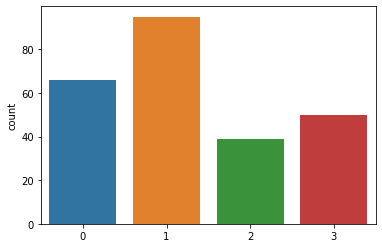

In [55]:
import seaborn as sns 
plt1 = sns.countplot(x = svm_predictions)

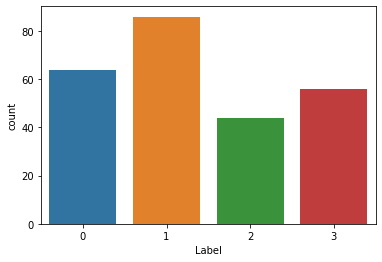

In [56]:
plt2 = sns.countplot(x = y_test)

In [57]:
from sklearn.model_selection import cross_val_score
svm = SVC(kernel='linear', C=1.0, random_state=2)
scores = cross_val_score(svm, vec_df, y_label, cv=5)
print(scores.mean())

1.0


In [58]:
from sklearn.model_selection import cross_val_score
svm = SVC(kernel='rbf', C=1.0, random_state=2)
scores = cross_val_score(svm, vec_df, y_label, cv=6)
print(scores.mean())

0.9960079840319361


In [59]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=55, random_state=0)
clf.fit(X_train, y_train)
rf_predictions = clf.predict(X_test)
acc_score = accuracy_score(y_test, rf_predictions)
print(acc_score)

0.896


In [60]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(eta0 = .01, max_iter=200)
clf.fit(X_train,y_train)
sg_predictions = clf.predict(X_test)
acc_score = accuracy_score(y_test, sg_predictions)
print(acc_score)

0.872


In [61]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(eta0 = .01, max_iter=100, loss = 'perceptron')
clf.fit(X_train,y_train)
sg_predictions = clf.predict(X_test)
acc_score = accuracy_score(y_test, sg_predictions)
print(acc_score)

0.84


Please keep accompanying files in the same folder
Takes 7 minutes to run (not on the Amherst Cluster)